Nome: Anakin Dantas Rodrigues Matrícula: 2023033173 

Nome: Pedro Andrade Rodrigues Matrícula: 2023033289 

Turma: TF

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

# Questão 1 - a) 

In [4]:
#Dados do enunciado

I = 1
w = 2*math.pi
T = 5

Sabendo que, $x_0 = I = 1$ e V = 0,
$$
\frac{dx}{dt} = V = \frac{x_1 - x_0}{\Delta{t}} = 0
$$

Temos:
$x_1 = x_0 = 1$

Agora que temos dois pontos, podemos calcular o terceiro com a segunda derivada:
$$
\frac{d^2x}{dt^2} = \frac{x_{n+1} -2x_n + x_{n-1}}{\Delta t^2} = -\omega^2x_n
$$
De tal forma que,

$$
x_{n+1} = -\omega^2x_n\Delta{t}^2 + 2x_n - x_{n-1}
$$
$$
x_{n+1} = x_n(-\omega^2\Delta{t}^2 + 2) - x_{n-1}
$$

In [5]:
t = np.linspace(0., 0.2, T) #tempo
print("t= ", t)

t=  [0.   0.05 0.1  0.15 0.2 ]


In [6]:
#definimos uma função para calcular $x_{n+1}$ de acordo com a fórmula acima

def xpróximo(xatual, xanterior, t): 
    dt = t[1] - t[0] #variação de tempo: (tempo atual - tempo anterior)
    
    return xatual*((-w**2)*(dt**2) + 2) - xanterior

xcalculado = [1, 1, ]

xatual = 1
xanterior = 1

#criamos uma iteração para generalizar os valores de x
for i in range(2, T):
    xproximo = xpróximo(xatual, xanterior, t)
    xcalculado.append(xproximo)
    xanterior = xatual
    xatual = xproximo

In [7]:
#função valor exato

def xexato(t):
    return I*np.cos(w*t)

In [8]:
#Comparação valor calculado com valor exato
dt = t[1] - t[0]
print("Delta t= ", dt)
print("Valor calculado:", xcalculado)
print("Valor exato:", xexato(t))

Delta t=  0.05
Valor calculado: [1, 1, 0.9013039559891065, 0.7136527770707197, 0.4555668922580649]
Valor exato: [1.         0.95105652 0.80901699 0.58778525 0.30901699]


# Questão 1 - b) 

Erro relativo da solução:

$$
\varepsilon = \left|\frac{xcalculado - xexato}{xexato}\right|
$$

In [9]:
#Para t = 2:

errorelativo = (xcalculado[2] - xexato(t)[2]) / xexato(t)[2]
print("Erro relativo calculado com Delta t = 0.05:", errorelativo)

Erro relativo calculado com Delta t = 0.05: 0.1140729579920143


In [10]:
#diminuindo \Delta t para 0.01
t1 = np.linspace(0., 0.4, T)
print(t1)

[0.  0.1 0.2 0.3 0.4]


In [11]:
xcalculado1 = [1, 1, ]

#partimos da mesma justificativa de que V=0

xatual = 1
xanterior = 1

for i in range(2, T):
    xproximo1 = xpróximo(xatual, xanterior, t1)
    xcalculado1.append(xproximo1)
    xanterior = xatual
    xatual = xproximo1

In [12]:
dt1 = t1[1] - t1[0] 
print("Delta t= ", dt1)
print("Valor calculado:", xcalculado1)
print("Valor exato:", xexato(t1))

Delta t=  0.1
Valor calculado: [1, 1, 0.6052158239564256, -0.028497982476319295, -0.6509612363782462]
Valor exato: [ 1.          0.80901699  0.30901699 -0.30901699 -0.80901699]


In [13]:
#erro relativo calculado com \Delta t = 0.01
#Para t = 2:
errorelativo1 = (xcalculado1[2] - xexato(t1[2])) / xexato(t1[2])
print("Erro relativo calcu1lado com Delta t = 0.01:", errorelativo1)

Erro relativo calcu1lado com Delta t = 0.01: 0.9585195473815388


Sabemos que o erro de precisão de uma máquina para uma variável float32 é de 2 x $10^{-7}$

In [48]:
listast = [] #Listas de t com periodo igual a 5 para diferentes Delta t cada vez maiores
deltat = [] #Lista com Delta t cada vez maiores
xproximos = [] #Lista de todos os valores de x em t[2] calculados pelo método das diferencias finitas centradas para cada t na lista acima
xexatos = [] #Lista de todos os valores de x em t[2] aplicados na fómula conhecida para o valor exato
nv = [] #Lista de avanços temporais para cada Delta t acima

#Criamos uma iteração para aumentar delta t progressivamente:

for i in range (0, 75):
    Nvec = 0.2*2**i
    nv.append(Nvec)
    t = np.linspace(0., Nvec, T)
    listast.append(t)
    dt = t[1] - t[0]
    deltat.append(dt)    

#Criamos uma iteração para coletar todos os valores de x em t[2] pelo método das diferencias:
for dt in deltat:
    xatual = 1
    xanterior = 1
    xpróximo = xatual*((-w**2)*(dt**2) + 2) - xanterior
    xproximos.append(xpróximo)

#Criamos uma iteração para coletar todos os valores exatos de x em t[2]:
for t in listast:
    x = I*np.cos(w*t)
    xexatos.append(x[2])

errototal = [] #Erros calculados para cada Delta t na lista acima

#Criamos uma iteração para calcular o erro combinando as listas acima:
for i in range(0, 75):
    erro = (xproximos[i] - xexatos[i]) / xexatos[i]
    errototal.append(erro)

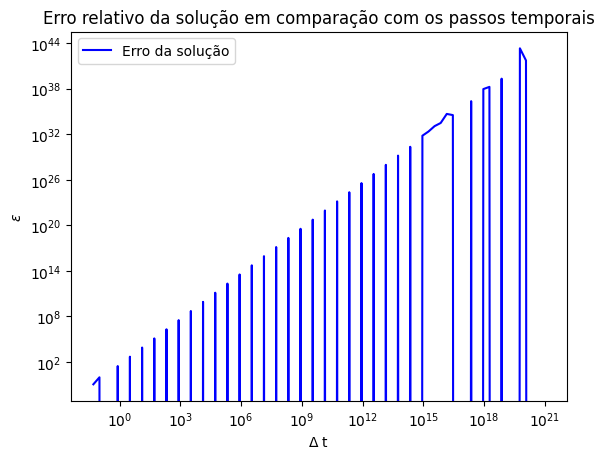

In [54]:
#Através do gráfico podemos analisar à partir de qual valor o erro de round-off é relevante:
plt.loglog(deltat, errototal, color='blue', label='Erro da solução')
plt.xlabel(r'$\Delta$ t')
plt.ylabel(r'$\epsilon$')
plt.title("Erro relativo da solução em comparação com os passos temporais")
plt.legend()
plt.show()

%matplotlib notebook

Dando zoom no gráfico é possível observar que o erro de round-off surge na ordem de 10$^{15}$

# Questão 2.1 - a) 

In [16]:
class Trajetoria:
#construtora da classe, cria um objeto chamado trajetoria
        def __init__(T,R, P, t):
                #R = raio em unidades astronômica
                #P = periodo em anos
                #t = instante de tempo t
               
                T.x = R * np.cos( (2 * np.pi * t)/P)
                T.y = R * np.sin( (2 * np.pi * t)/P)
           
        def soma(T1, T2):
                return Trajetoria(T1.x + T2.x , T1.y + T2.y )

In [17]:
tempo = np.linspace(0,1.,100)

#print(t)

R = 1 # raio planeta Terra
P = 1 # período planeta Terra

r = 0.025 #raio satelite Lua
p = 1/12 # período satélite Lua

planeta = Trajetoria(R, P, tempo)
satelite = Trajetoria(r, p, tempo)

#resolver dentro da classe

satelite.x = satelite.x + planeta.x
satelite.y = satelite.y + planeta.y

Text(0.5, 1.0, 'X em função do tempo')

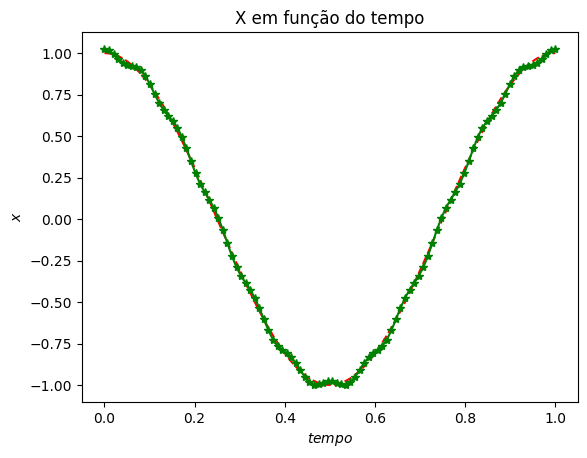

In [57]:
fig, ax = plt.subplots()
ax.plot(tempo,planeta.x, 'r--', label='Terra'); 
ax.plot(tempo,satelite.x, 'g*-', label='Lua (em referencial inercial)');
ax.set_ylabel(r'$x$')
ax.set_xlabel(r'$tempo$')
ax.set_title("X em função do tempo") 

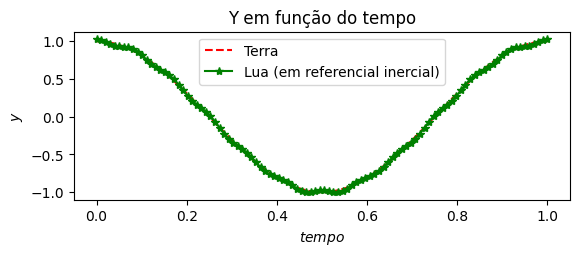

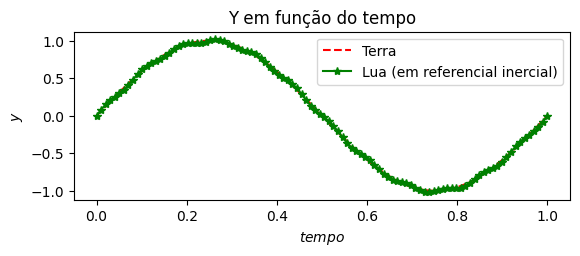

In [40]:
plt.subplot(2,1, 1) #coordenadas y vs t
plt.plot(tempo,planeta.x, 'r--', label='Terra'); 
plt.plot(tempo,satelite.x, 'g*-', label='Lua (em referencial inercial)'); 
plt.ylabel(r'$y$')
plt.xlabel(r'$tempo$')
plt.title("Y em função do tempo") 
plt.legend() 
plt.show()


plt.subplot(2,1, 2) #coordenadas y vs t
plt.plot(tempo,planeta.y, 'r--', label='Terra'); 
plt.plot(tempo,satelite.y, 'g*-', label='Lua (em referencial inercial)'); 
plt.ylabel(r'$y$')
plt.xlabel(r'$tempo$')
plt.title("Y em função do tempo") 
plt.legend() 
plt.show()

%matplotlib notebook

Através desses gráficos inicialmente somos levados a pensar que a trajetória da Terra e da Lua coincidem na mesma função, porém com o zoom percebemos que aparentemente as coordenadas da lua variam em torno das coordenadas da Terra, vamos continuar analisando outros gráficos para entender melhor esse comportamento:

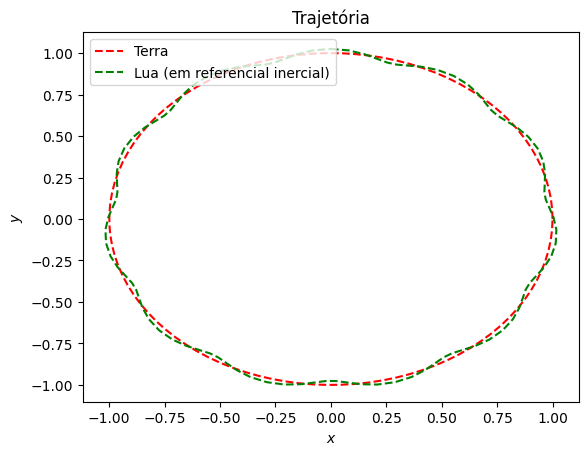

In [58]:
fig, ax = plt.subplots() #coordenadas x vs y
ax.plot(planeta.x, planeta.y,'r--', label='Terra')
ax.plot(satelite.y, satelite.x, 'g--', label=r'Lua (em referencial inercial)')
ax.legend(loc=2) 
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Trajetória');

A trajetória encontrada aqui condiz com o movimento esperado, dado que usamos a descrição de um movimento circular para os cálculos. Também podemos observar que o movimento da Lua varia não só em relação ao centro (que seria o Sol), mas também em relação à Terra, confirmando que o código funciona para descrever a trajetória do satélite.

Vamos testar para outros valores de R e r:

In [43]:
planeta1 = Trajetoria(0.5, P, tempo)
satelite1 = Trajetoria(0.2, p, tempo)

#resolver dentro da classe

satelite1.x = satelite1.x + planeta1.x
satelite1.y = satelite1.y + planeta1.y

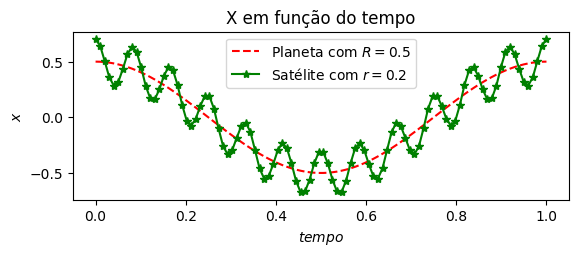

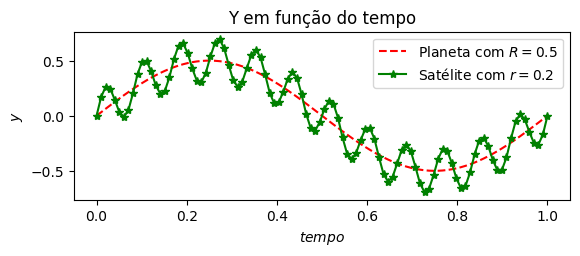

In [63]:
plt.subplot(2,1,1) #coordenadas x vs t
plt.plot(tempo, planeta1.x, 'r--', label='Planeta com $R = 0.5$') 
plt.plot(tempo, satelite1.x, 'g*-', label='Satélite com $r = 0.2$') 
plt.ylabel(r'$x$')
plt.xlabel(r'$tempo$')
plt.title("X em função do tempo") 
plt.legend() 
plt.show() 



plt.subplot(2,1,2) #coordenadas y vs t
plt.plot(tempo,planeta1.y, 'r--', label='Planeta com $R = 0.5$'); 
plt.plot(tempo,satelite1.y, 'g*-', label='Satélite com $r = 0.2$') 
plt.ylabel(r'$y$')
plt.xlabel(r'$tempo$')
plt.title("Y em função do tempo") 
plt.legend() 
plt.show() 

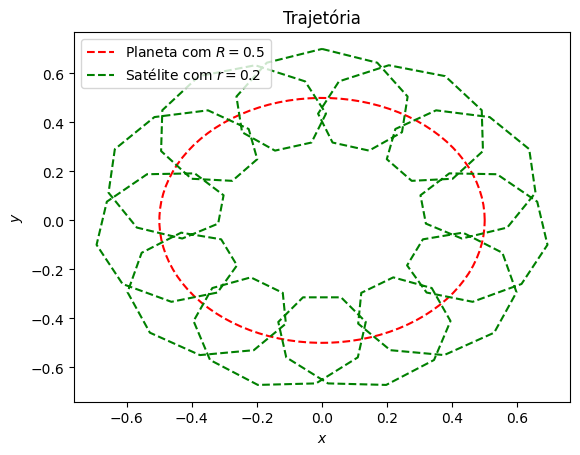

In [64]:
fig, ax = plt.subplots() #coordenadas x vs y
ax.plot(planeta1.x, planeta1.y,'r--', label='Planeta com $R = 0.5$')
ax.plot(satelite1.y, satelite1.x, 'g--', label=r'Satélite com $r = 0.2$')
ax.legend(loc=2) 
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Trajetória');

Agora que trabalhamos com raios menores, ficou mais claro o comportamento do satélite em seu movimento ao redor do planeta, enquanto o mesmo se move em torno da estrela no centro do movimento. A descrição acima é uma boa aproximação para a trajetória real.